In [1]:
# Utilities
import utils.data_loader as data_loader
import numpy as np
X_test, y_test = data_loader.get_test_data()

## SVM

In [2]:
import joblib
from sklearn.metrics import accuracy_score

In [3]:
svm_model = joblib.load("SVM/svm_model.pkl")
y_predict = svm_model.predict(X_test)
accuracy = accuracy_score(y_predict, y_test)

print('Accuracy Score:', accuracy)

Accuracy Score: 0.9824


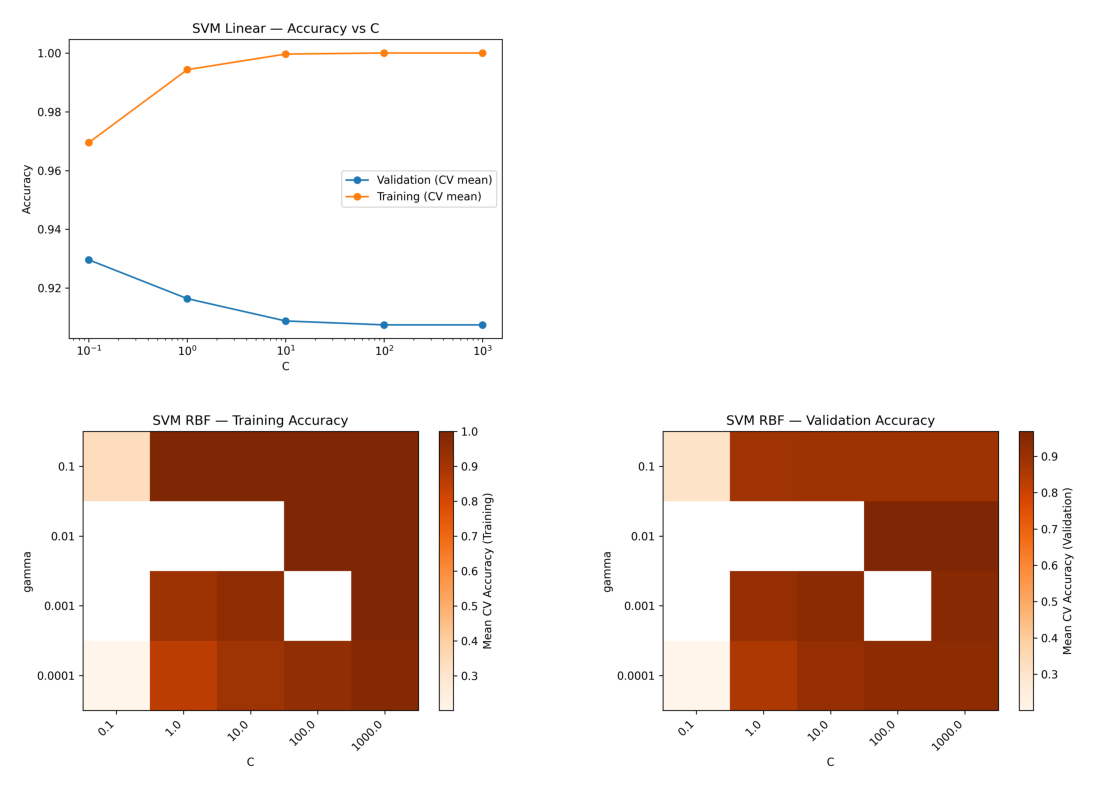

In [4]:
# plots hyperparameter optimization (detailed report can be found in SVM/report)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_linear = "SVM/results/svm_linear_accuracy_vs_C.png"
img_rbf_train = "SVM/results/svm_rbf_training_heatmap.png"
img_rbf_val = "SVM/results/svm_rbf_validation_heatmap.png"

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].imshow(mpimg.imread(img_linear))
axes[0, 0].axis("off")
axes[0, 1].remove()

axes[1, 0].imshow(mpimg.imread(img_rbf_train))
axes[1, 1].imshow(mpimg.imread(img_rbf_val))

for ax in axes.flat:
    ax.axis("off")

plt.tight_layout()
plt.show()


## MLP

The MLP models were trained and evaluated across all combinations of the following hyperparameters:

- `HIDDEN_SIZES = [32, 64, 128, 256]`
- `LEARNING_RATES = [0.0001, 0.001, 0.01]`

All models were trained with the following relevant training settings:
- Single hidden layer
- 15 epochs
- batch size 250

The following table shows the validation accuracy for the evaluated models:

![MLP Results summary](MLP/images/MLP_result_summary.jpg)

The best performing model with `HIDDEN_SIZE=256` and `LEARNING_RATE=0.001` with validation accuracy `0.9774` achieved a test accuracy of **`0.9784`**.

The following graph displays the loss and accuracy curves for the training and validation sets of this best model:

![MLP Best Model's Loss/Accuracy curves](MLP/images/MLP_best_loss_accuracy.jpg)

## CNN

In [2]:

def ensure_4d(X):
    X = np.asarray(X)
    if X.ndim == 2 and X.shape[1] == 28*28:
        X = X.reshape((-1, 28, 28, 1))
    elif X.ndim == 3 and X.shape[1] == 28 and X.shape[2] == 28:
        X = X.reshape((-1, 28, 28, 1))
    return X.astype('float32')

X_test = ensure_4d(X_test)

In [3]:
import tensorflow as tf

cnn_model = tf.keras.models.load_model("CNN/cnn_model.keras")
cnn_modelk5 = tf.keras.models.load_model("CNN/cnn_modelk(5, 5)l2.keras")
cnn_modelk7 = tf.keras.models.load_model("CNN/cnn_modelk(7, 7)l3.keras")

test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=0)
test_lossk5, test_acck5 = cnn_modelk5.evaluate(X_test, y_test, verbose=0)
test_lossk7, test_acck7 = cnn_modelk7.evaluate(X_test, y_test, verbose=0)

print(f"Test accuracy for model with k=3 and l=3 is: {test_acc}")
print(f"Test accuracy for model with k=5 and l=2 is: {test_acck5}")
print(f"Test accuracy for model with k=7 and l=3 is: {test_acck7}")



Test accuracy for model with k=3 and l=3 is: 0.9886000156402588
Test accuracy for model with k=5 and l=2 is: 0.9896000027656555
Test accuracy for model with k=7 and l=3 is: 0.9909999966621399


In [4]:
from utils.legacy_model_loader import load_legacy_keras_model


def load_cnn_model(path: str):
    model = load_legacy_keras_model(path)
    model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


cnn_model = load_cnn_model("CNN/cnn_model.keras")
cnn_modelk5 = load_cnn_model("CNN/cnn_modelk(5, 5)l2.keras")
cnn_modelk7 = load_cnn_model("CNN/cnn_modelk(7, 7)l3.keras")


test_loss, test_acc = cnn_model.evaluate(X_test, y_test, verbose=0)
test_lossk5, test_acck5 = cnn_modelk5.evaluate(X_test, y_test, verbose=0)
test_lossk7, test_acck7 = cnn_modelk7.evaluate(X_test, y_test, verbose=0)

print(f"Test accuracy for model with k=3 and l=3 is: {test_acc}")
print(f"Test accuracy for model with k=5 and l=2 is: {test_acck5}")
print(f"Test accuracy for model with k=7 and l=3 is: {test_acck7}")

Test accuracy for model with k=3 and l=3 is: 0.9886000156402588
Test accuracy for model with k=5 and l=2 is: 0.9896000027656555
Test accuracy for model with k=7 and l=3 is: 0.9909999966621399


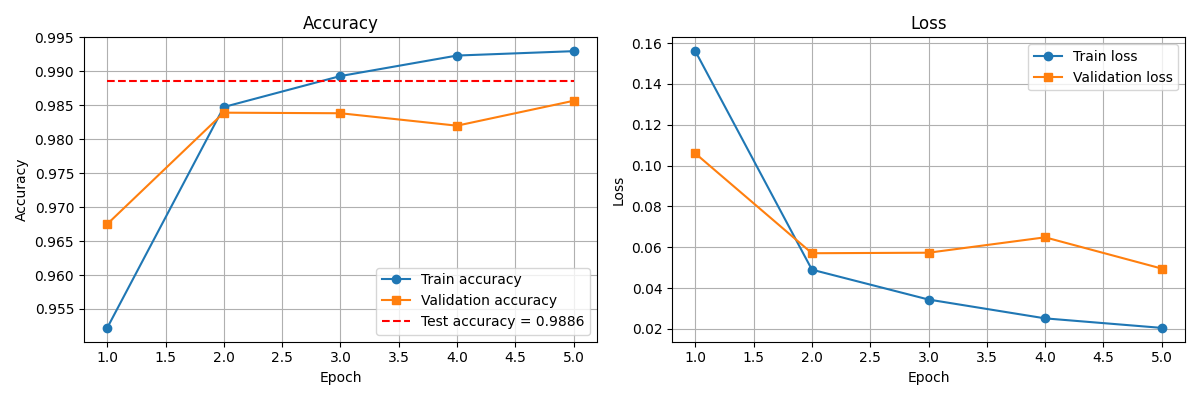

In [8]:
from IPython.display import Image
Image(filename='CNN/accuracy_loss_cnn.png')

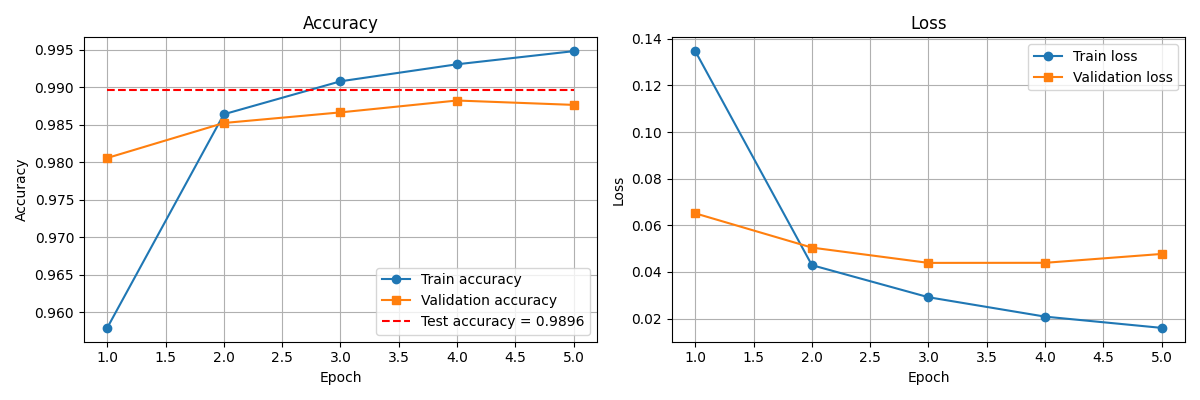

In [9]:
from IPython.display import Image
Image(filename='CNN/accuracy_loss_cnn(5, 5)l2.png')

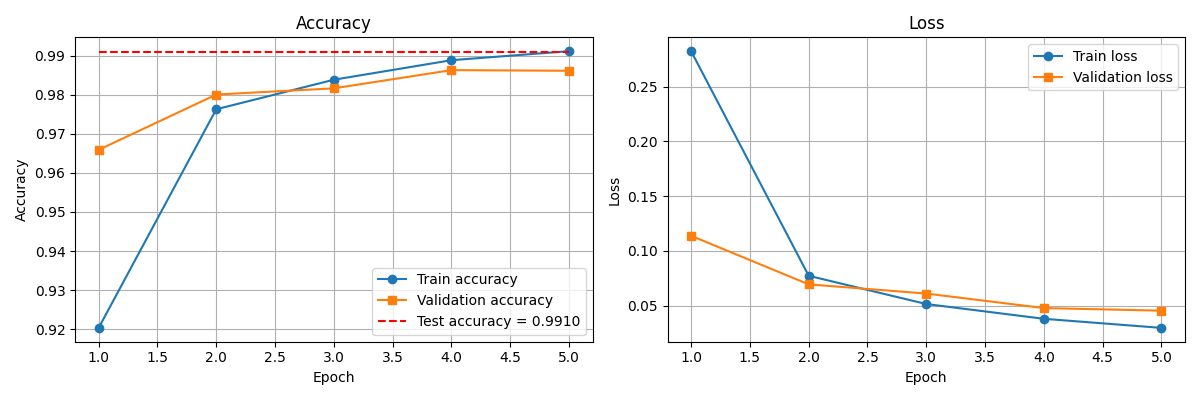

In [10]:
from IPython.display import Image
Image(filename='CNN/accuracy_loss_cnn(7, 7)l3.png')

I tested CNN models with 3 different configurations:
1. k=3; layers=3; learning rate = 1e-3
2. k=5; layers=2; learning rate = 1e-4
3. k=7; layers=3; learning rate = 1e-4

All models used 5 epochs and the same batch and filter size.
As you may observe does the model with 7 layers perform the best with an accuracy on the test with of 0.99. The other two models seem to slightly overfit as the train loss still decreases while the validation loss is already increasing again.